Epoch 0, Loss: 0.6990
Epoch 10, Loss: 0.6334
Epoch 20, Loss: 0.5936
Epoch 30, Loss: 0.5692
Epoch 40, Loss: 0.5540
Epoch 50, Loss: 0.5444
Epoch 60, Loss: 0.5381
Epoch 70, Loss: 0.5340
Epoch 80, Loss: 0.5312
Epoch 90, Loss: 0.5294

Final Accuracy: 78.01%


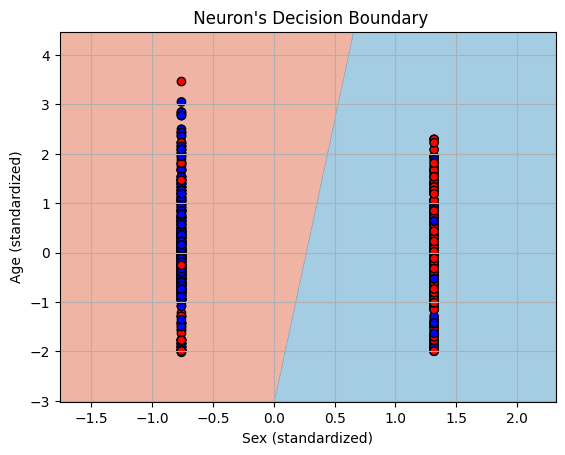

In [7]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df = df[['Survived', 'Sex', 'Age']]
df.dropna(inplace=True)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

X = df[['Sex', 'Age']].values
y = df['Survived'].values.reshape(-1, 1)

scaler = StandardScaler()
X = scaler.fit_transform(X)


np.random.seed(42)
weights = np.random.randn(X.shape[1], 1)
bias = np.random.randn(1)
lr = 0.1

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def binary_cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred + 1e-8) + (1 - y_true) * np.log(1 - y_pred + 1e-8))


for epoch in range(100):
    z = np.dot(X, weights) + bias
    y_pred = sigmoid(z)
    loss = binary_cross_entropy(y, y_pred)

    dz = y_pred - y
    dw = np.dot(X.T, dz) / len(X)
    db = np.sum(dz) / len(X)

    weights -= lr * dw
    bias -= lr * db

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

y_pred_class = (y_pred > 0.5).astype(int)
accuracy = (y_pred_class == y).mean()
print(f"\nFinal Accuracy: {accuracy * 100:.2f}%")


x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
z = sigmoid(np.dot(grid, weights) + bias).reshape(xx.shape)

plt.contourf(xx, yy, z, levels=[0, 0.5, 1], cmap='RdBu', alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y.reshape(-1), cmap='bwr', edgecolor='k')
plt.title(" Neuron's Decision Boundary")
plt.xlabel("Sex (standardized)")
plt.ylabel("Age (standardized)")
plt.grid(True)
plt.show()
